# ALMA-IMF Figure Getter

In [13]:
name = 'btingle'
fieldid = 'G328'
mipsview = True

For this to work, you need to have a folder in your top-level directory called 'figures'. (For example, mine is /home/btingle/figures/.) This is where the code will dump a location image for each source in your region, and where plot_fit (with my additions) will pull from to display them alongside your data. Also, mipsview determines whether MIPS data is shown.

After you set the above variables, you should be able to just run every cell below as-is.

In [14]:
from astropy.io import fits
from astropy.table import Table
from astropy import table
from astropy import coordinates
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.stats import sigma_clipped_stats
from astropy import wcs
from astropy.wcs import WCS

import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from spectral_cube import SpectralCube
from spectralindex import prefixes

import spitzer_plots
from spitzer_plots import show_fov_on_spitzer, contour_levels, get_spitzer_data

import pylab as pl

pl.style.use('dark_background')
pl.rcParams['font.size'] = 16

In [15]:
fulltbl = Table.read('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits')
fullcoords = SkyCoord(fulltbl['l'], fulltbl['b'], frame='galactic', unit=(u.deg, u.deg))

fulltbl.add_index('ALMAIMF_FIELDID')
tbl = fulltbl.loc[fieldid]

tbl.remove_indices('ALMAIMF_FIELDID')
tbl.add_index('SPICY')
tbl.sort('SPICY')

coords = SkyCoord(tbl['l'], tbl['b'], frame='galactic', unit=(u.deg, u.deg))

read ('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits', <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>, <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>) {}


In [16]:
def show_source_on_spitzer(fieldid, rownum, coords,
                           basepath='/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults', tblpath='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits',
                           mips=False):
    tbl = Table.read(tblpath)
    pfxs = prefixes[fieldid]
    fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                              fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                              contour_level=contour_levels[fieldid], mips=mips)

    cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                             format='fits', use_dask=False).minimal_subcube()
    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]
    matches = ww.footprint_contains(coords)

    cc = coords[matches]
    
    ax = fig.gca()
    ax.plot(cc[rownum].fk5.ra.deg, cc[rownum].fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=12, transform=ax.get_transform('fk5'), )

    return fig

read ('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits', <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>, <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>) {}
read ('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits', <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>, <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>) {}
read ('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits', <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>, <_io.FileIO name='/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits' mode='rb' closefd=True>) {}
read ('

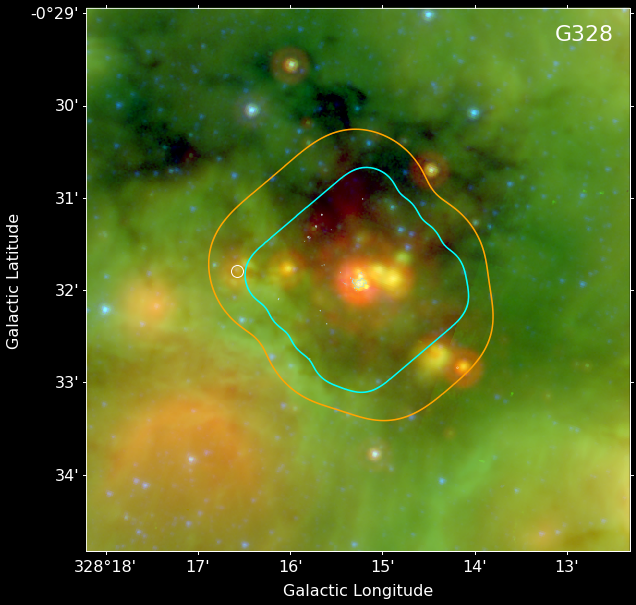

In [17]:
sourceids = []
for spicyid in tbl['SPICY']:
    sourceids.append(spicyid)
    
for index, source in enumerate(sourceids):
    fig = show_source_on_spitzer(fieldid,index,fullcoords,mips=mipsview)
    fig.savefig(f'/home/{name}/figures/{fieldid}_{source}', overwrite=True)